# Generating Graphs for EDA Interpretation

### Before Starting You May Need to Install seaborn & StandardScaler
```
%pip install seaborn
%pip install StandardScaler
```

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Data Checks & Transformation

In [9]:
raw_annotation = pd.read_csv("..\..\data\Human.GRCh38.p13.annot.tsv", sep = '\t')

C:\Users\mzora\AppData\Local\Temp\ipykernel_22916\169136157.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_annotation = pd.read_csv("..\..\data\Human.GRCh38.p13.annot.tsv", sep = '\t')


In [10]:
raw_annotation

,GeneID,Symbol,Description,Synonyms,GeneType,EnsemblGeneID,Status,ChrAcc,ChrStart,ChrStop,Orientation,Length,GOFunctionID,GOProcessID,GOComponentID,GOFunction,GOProcess,GOComponent
0,100287102,DDX11L1,DEAD/H-box helicase 11 like 1 (pseudogene),NaN,pseudo,ENSG00000290825,active,NC_000001.11,11874,14409,positive,1652,NaN,NaN,NaN,NaN,NaN,NaN
1,653635,WASH7P,"WASP family homolog 7, pseudogene",FAM39F|WASH5P,pseudo,NaN,active,NC_000001.11,14362,29370,negative,1769,NaN,NaN,NaN,NaN,NaN,NaN
2,102466751,MIR6859-1,microRNA 6859-1,hsa-mir-6859-1,ncRNA,ENSG00000278267,active,NC_000001.11,17369,17436,negative,68,NaN,NaN,NaN,NaN,NaN,NaN
3,107985730,MIR1302-2HG,MIR1302-2 host gene,NaN,ncRNA,NaN,active,NC_000001.11,29926,31295,positive,538,NaN,NaN,NaN,NaN,NaN,NaN
4,100302278,MIR1302-2,microRNA 1302-2,MIRN1302-2|hsa-mir-1302-2,ncRNA,ENSG00000284332,active,NC_000001.11,30366,30503,positive,138,NaN,GO:0035195,NaN,NaN,miRNA-mediated gene silencing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39371,4541,ND6,NADH dehydrogenase subunit 6,MTND6,protein-coding,NaN,active,NC_012920.1,14149,14673,negative,525,GO:0008137,GO:0006120///GO:0009060///GO:0032981///GO:0035...,GO:0005739///GO:0005743///GO:0005747,NADH dehydrogenase (ubiquinone) activity,"mitochondrial electron transport, NADH to ubiq...",mitochondrion///mitochondrial inner membrane//...
39372,4556,TRNE,tRNA-Glu,MTTE,tRNA,NaN,active,NC_012920.1,14674,14742,negative,69,NaN,NaN,NaN,NaN,NaN,NaN
39373,4519,CYTB,cytochrome b,MTCYB,protein-coding,NaN,active,NC_012920.1,14747,15887,positive,1141,GO:0008121///GO:0046872,GO:0006122///GO:0045333///GO:1902600,GO:0005739///GO:0005743///GO:0005750///GO:0016020,ubiquinol-cytochrome-c reductase activity///me...,"mitochondrial electron transport, ubiquinol to...",mitochondrion///mitochondrial inner membrane//...
39374,4576,TRNT,tRNA-Thr,MTTT,tRNA,NaN,active,NC_012920.1,15888,15953,positive,66,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
raw_df1 = pd.read_csv("../../data/GSE218462_raw_counts_GRCh38.p13_NCBI.tsv", sep = '\t')
raw_df2 = pd.read_csv("../../data/GSE218463_raw_counts_GRCh38.p13_NCBI.tsv", sep = '\t')

In [15]:
raw_df1

,GeneID,GSM6745599,GSM6745600,GSM6745601,GSM6745602,GSM6745603,GSM6745604,GSM6745605,GSM6745606,GSM6745607,...,GSM6745628,GSM6745629,GSM6745630,GSM6745631,GSM6745632,GSM6745633,GSM6745634,GSM6745635,GSM6745636,GSM6745637
0,100287102,22,12,28,23,25,20,25,16,24,...,23,17,14,17,26,32,14,24,32,28
1,653635,211,123,334,211,243,281,281,143,245,...,289,214,160,279,246,275,179,203,245,226
2,102466751,3,0,4,2,3,6,1,2,6,...,2,3,3,5,4,2,5,2,4,5
3,107985730,2,1,1,2,3,2,1,0,3,...,2,2,0,2,1,1,1,1,2,1
4,100302278,1,1,0,0,0,0,0,1,0,...,1,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39371,4541,4236,3074,7594,6209,6113,7364,4842,3128,5136,...,2727,2779,1899,5550,6694,6645,2262,2990,5252,4305
39372,4556,269,213,459,361,406,496,346,204,309,...,89,112,97,334,415,227,63,158,311,240
39373,4519,18928,14177,30965,25035,25410,28746,18416,13381,21677,...,25261,21399,13606,28620,31561,48604,19777,17037,25027,22450
39374,4576,134,87,228,152,156,214,130,92,124,...,180,114,78,179,219,337,108,98,128,147


In [16]:
raw_df2

,GeneID,GSM6745638,GSM6745639,GSM6745640,GSM6745641,GSM6745642,GSM6745643
0,100287102,12,11,15,7,16,6
1,653635,790,563,804,719,1007,461
2,102466751,24,22,28,30,49,23
3,107985730,2,1,2,3,3,1
4,100302278,1,0,0,0,2,0
...,...,...,...,...,...,...,...
39371,4541,33248,26187,29952,26221,36334,19253
39372,4556,1605,1261,1397,1204,1788,897
39373,4519,43049,34648,40265,32729,48612,25930
39374,4576,240,221,234,205,317,164


In [17]:
genes = raw_df1["GeneID"]
samples = raw_df1.columns
samples

Index(['GeneID', 'GSM6745599', 'GSM6745600', 'GSM6745601', 'GSM6745602',
       'GSM6745603', 'GSM6745604', 'GSM6745605', 'GSM6745606', 'GSM6745607',
       'GSM6745609', 'GSM6745610', 'GSM6745611', 'GSM6745612', 'GSM6745613',
       'GSM6745614', 'GSM6745615', 'GSM6745616', 'GSM6745617', 'GSM6745618',
       'GSM6745619', 'GSM6745620', 'GSM6745621', 'GSM6745622', 'GSM6745623',
       'GSM6745624', 'GSM6745625', 'GSM6745626', 'GSM6745627', 'GSM6745628',
       'GSM6745629', 'GSM6745630', 'GSM6745631', 'GSM6745632', 'GSM6745633',
       'GSM6745634', 'GSM6745635', 'GSM6745636', 'GSM6745637'],
      dtype='object')

In [18]:
raw_df1_T = raw_df1.T
raw_df1_T

,0,1,2,3,4,5,6,7,8,9,...,39366,39367,39368,39369,39370,39371,39372,39373,39374,39375
GeneID,100287102,653635,102466751,107985730,100302278,645520,79501,100996442,729737,102725121,...,4538,4564,4575,4568,4540,4541,4556,4519,4576,4571
GSM6745599,22,211,3,2,1,0,0,33,64,25,...,25802,21,15,8,14544,4236,269,18928,134,194
GSM6745600,12,123,0,1,1,0,0,19,56,12,...,16362,17,17,11,10924,3074,213,14177,87,188
GSM6745601,28,334,4,1,0,0,0,51,95,31,...,38224,32,24,14,24383,7594,459,30965,228,374
GSM6745602,23,211,2,2,0,0,0,44,71,27,...,31670,28,19,16,19763,6209,361,25035,152,243
GSM6745603,25,243,3,3,0,0,0,36,58,32,...,33866,35,23,10,18650,6113,406,25410,156,274
GSM6745604,20,281,6,2,0,0,0,40,77,24,...,40186,37,27,7,22464,7364,496,28746,214,315
GSM6745605,25,281,1,1,0,0,0,32,61,27,...,27199,40,33,8,14375,4842,346,18416,130,293
GSM6745606,16,143,2,0,1,1,0,19,45,16,...,18906,15,11,6,10908,3128,204,13381,92,152
GSM6745607,24,245,6,3,0,0,0,34,61,29,...,29229,22,16,7,16875,5136,309,21677,124,214


In [19]:
raw_df2_T = raw_df2.T
raw_df2_T

,0,1,2,3,4,5,6,7,8,9,...,39366,39367,39368,39369,39370,39371,39372,39373,39374,39375
GeneID,100287102,653635,102466751,107985730,100302278,645520,79501,100996442,729737,102725121,...,4538,4564,4575,4568,4540,4541,4556,4519,4576,4571
GSM6745638,12,790,24,2,1,0,0,46,197,17,...,114996,177,259,296,61977,33248,1605,43049,240,536
GSM6745639,11,563,22,1,0,0,0,29,136,7,...,93944,131,219,247,49177,26187,1261,34648,221,436
GSM6745640,15,804,28,2,0,1,0,53,1190,17,...,109059,179,302,350,56567,29952,1397,40265,234,523
GSM6745641,7,719,30,3,0,0,0,41,137,12,...,83169,133,219,261,45658,26221,1204,32729,205,403
GSM6745642,16,1007,49,3,2,0,0,58,209,18,...,127644,226,381,432,70620,36334,1788,48612,317,636
GSM6745643,6,461,23,1,0,0,0,22,79,8,...,64571,107,178,199,36364,19253,897,25930,164,353


In [20]:
raw_df1_T.columns = raw_df1_T.iloc[0]
raw_df1_T = raw_df1_T[1:]
raw_df2_T.columns = raw_df2_T.iloc[0]
raw_df2_T = raw_df2_T[1:]
raw_df1_T

GeneID,100287102,653635,102466751,107985730,100302278,645520,79501,100996442,729737,102725121,...,4538,4564,4575,4568,4540,4541,4556,4519,4576,4571
GSM6745599,22,211,3,2,1,0,0,33,64,25,...,25802,21,15,8,14544,4236,269,18928,134,194
GSM6745600,12,123,0,1,1,0,0,19,56,12,...,16362,17,17,11,10924,3074,213,14177,87,188
GSM6745601,28,334,4,1,0,0,0,51,95,31,...,38224,32,24,14,24383,7594,459,30965,228,374
GSM6745602,23,211,2,2,0,0,0,44,71,27,...,31670,28,19,16,19763,6209,361,25035,152,243
GSM6745603,25,243,3,3,0,0,0,36,58,32,...,33866,35,23,10,18650,6113,406,25410,156,274
GSM6745604,20,281,6,2,0,0,0,40,77,24,...,40186,37,27,7,22464,7364,496,28746,214,315
GSM6745605,25,281,1,1,0,0,0,32,61,27,...,27199,40,33,8,14375,4842,346,18416,130,293
GSM6745606,16,143,2,0,1,1,0,19,45,16,...,18906,15,11,6,10908,3128,204,13381,92,152
GSM6745607,24,245,6,3,0,0,0,34,61,29,...,29229,22,16,7,16875,5136,309,21677,124,214
GSM6745609,20,175,1,1,0,0,0,22,38,26,...,25079,9,7,4,15199,3913,141,16099,81,148


In [22]:
raw_df2_T

GeneID,100287102,653635,102466751,107985730,100302278,645520,79501,100996442,729737,102725121,...,4538,4564,4575,4568,4540,4541,4556,4519,4576,4571
GSM6745638,12,790,24,2,1,0,0,46,197,17,...,114996,177,259,296,61977,33248,1605,43049,240,536
GSM6745639,11,563,22,1,0,0,0,29,136,7,...,93944,131,219,247,49177,26187,1261,34648,221,436
GSM6745640,15,804,28,2,0,1,0,53,1190,17,...,109059,179,302,350,56567,29952,1397,40265,234,523
GSM6745641,7,719,30,3,0,0,0,41,137,12,...,83169,133,219,261,45658,26221,1204,32729,205,403
GSM6745642,16,1007,49,3,2,0,0,58,209,18,...,127644,226,381,432,70620,36334,1788,48612,317,636
GSM6745643,6,461,23,1,0,0,0,22,79,8,...,64571,107,178,199,36364,19253,897,25930,164,353


In [23]:
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(raw_df1_T)
scaled_data2 = scaler.fit_transform(raw_df2_T)

In [24]:
scaled_df1 = pd.DataFrame(scaled_data1)
scaled_df1

,0,1,2,3,4,5,6,7,8,9,...,39366,39367,39368,39369,39370,39371,39372,39373,39374,39375
0,0.212625,-0.318248,-0.042237,0.184916,1.063410,-0.29277,-0.235702,0.117663,0.140983,-0.006097,...,-0.238021,-0.214857,-0.267632,0.466206,-0.318275,-0.133587,0.136065,-0.604440,-0.270274,-0.375282
1,-1.311857,-1.500716,-1.647234,-0.818915,1.063410,-0.29277,-0.235702,-1.159822,-0.267197,-1.511998,...,-1.264922,-0.613129,0.007233,1.309818,-0.981598,-0.819478,-0.337051,-1.184536,-1.084285,-0.450273
2,1.127315,1.334520,0.492762,-0.818915,-0.773389,-0.29277,-0.235702,1.760144,1.722682,0.688935,...,1.113269,0.880390,0.969260,2.153430,1.484606,1.848533,1.741280,0.865277,1.357749,1.874436
3,0.365073,-0.318248,-0.577236,0.184916,-0.773389,-0.29277,-0.235702,1.121401,0.498141,0.225580,...,0.400312,0.482118,0.282098,2.715838,0.638045,1.031012,0.913327,0.141225,0.041475,0.237141
4,0.669970,0.111740,-0.042237,1.188747,-0.773389,-0.29277,-0.235702,0.391410,-0.165152,0.804773,...,0.639197,1.179094,0.831828,1.028614,0.434101,0.974346,1.293509,0.187012,0.110753,0.624593
5,-0.092271,0.622352,1.562760,0.184916,-0.773389,-0.29277,-0.235702,0.756406,0.804276,-0.121935,...,1.326699,1.378230,1.381557,0.185003,1.132972,1.712771,2.053874,0.594337,1.115277,1.137029
6,0.669970,0.622352,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,0.026414,-0.012084,0.225580,...,-0.086052,1.676933,2.206152,0.466206,-0.349242,0.224115,0.786600,-0.666955,-0.339551,0.862063
7,-0.702064,-1.231973,-0.577236,-1.822745,1.063410,3.41565,-0.235702,-1.159822,-0.828445,-1.048644,...,-0.988181,-0.812265,-0.817361,-0.096201,-0.984529,-0.787604,-0.413087,-1.281728,-0.997688,-0.900216
8,0.517522,0.138615,1.562760,1.188747,-0.773389,-0.29277,-0.235702,0.208912,-0.012084,0.457258,...,0.134775,-0.115289,-0.130199,0.185003,0.108853,0.397654,0.474005,-0.268787,-0.443467,-0.125313
9,-0.092271,-0.801985,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,-0.886075,-1.185602,0.109742,...,-0.316670,-1.409672,-1.367091,-0.658609,-0.198254,-0.324244,-0.945342,-0.949860,-1.188201,-0.950210


In [25]:
scaled_df2 = pd.DataFrame(scaled_data2)
scaled_df2

,0,1,2,3,4,5,6,7,8,9,...,39366,39367,39368,39369,39370,39371,39372,39373,39374,39375
0,0.224281,0.374895,-0.577727,0.000000,0.654654,-0.447214,0.0,0.355479,-0.327882,0.861357,...,0.767626,0.459539,-0.010033,-0.019801,0.768665,0.856026,0.859297,0.746773,0.213341,0.581740
1,-0.044856,-0.914517,-0.794374,-1.224745,-0.654654,-0.447214,0.0,-0.987441,-0.484546,-1.385661,...,-0.236177,-0.704065,-0.612015,-0.666617,-0.377638,-0.425789,-0.340695,-0.391784,-0.198878,-0.479184
2,1.031691,0.454418,-0.144432,0.000000,-0.654654,2.236068,0.0,0.908445,2.222404,0.861357,...,0.484537,0.510131,0.637098,0.693018,0.284173,0.257688,0.133720,0.369468,0.083167,0.443820
3,-1.121403,-0.028401,0.072216,1.224745,-0.654654,-0.447214,0.0,-0.039498,-0.481977,-0.262152,...,-0.749951,-0.653473,-0.612015,-0.481812,-0.692783,-0.419617,-0.539531,-0.651860,-0.546009,-0.829289
4,1.300828,1.607505,2.130367,1.224745,1.963961,-0.447214,0.0,1.303422,-0.297062,1.086059,...,1.370708,1.699031,1.826013,1.775445,1.542689,1.416241,1.497664,1.500707,1.883913,1.642664
5,-1.390540,-1.493900,-0.686050,-1.224745,-0.654654,-0.447214,0.0,-1.540407,-0.630937,-1.160959,...,-1.636743,-1.311163,-1.229047,-1.300233,-1.525107,-1.684549,-1.610454,-1.573304,-1.435535,-1.359751


In [26]:
scaled_df1.columns = raw_df1_T.columns
scaled_df1.index = raw_df1_T.index
scaled_df1

GeneID,100287102,653635,102466751,107985730,100302278,645520,79501,100996442,729737,102725121,...,4538,4564,4575,4568,4540,4541,4556,4519,4576,4571
GSM6745599,0.212625,-0.318248,-0.042237,0.184916,1.063410,-0.29277,-0.235702,0.117663,0.140983,-0.006097,...,-0.238021,-0.214857,-0.267632,0.466206,-0.318275,-0.133587,0.136065,-0.604440,-0.270274,-0.375282
GSM6745600,-1.311857,-1.500716,-1.647234,-0.818915,1.063410,-0.29277,-0.235702,-1.159822,-0.267197,-1.511998,...,-1.264922,-0.613129,0.007233,1.309818,-0.981598,-0.819478,-0.337051,-1.184536,-1.084285,-0.450273
GSM6745601,1.127315,1.334520,0.492762,-0.818915,-0.773389,-0.29277,-0.235702,1.760144,1.722682,0.688935,...,1.113269,0.880390,0.969260,2.153430,1.484606,1.848533,1.741280,0.865277,1.357749,1.874436
GSM6745602,0.365073,-0.318248,-0.577236,0.184916,-0.773389,-0.29277,-0.235702,1.121401,0.498141,0.225580,...,0.400312,0.482118,0.282098,2.715838,0.638045,1.031012,0.913327,0.141225,0.041475,0.237141
GSM6745603,0.669970,0.111740,-0.042237,1.188747,-0.773389,-0.29277,-0.235702,0.391410,-0.165152,0.804773,...,0.639197,1.179094,0.831828,1.028614,0.434101,0.974346,1.293509,0.187012,0.110753,0.624593
GSM6745604,-0.092271,0.622352,1.562760,0.184916,-0.773389,-0.29277,-0.235702,0.756406,0.804276,-0.121935,...,1.326699,1.378230,1.381557,0.185003,1.132972,1.712771,2.053874,0.594337,1.115277,1.137029
GSM6745605,0.669970,0.622352,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,0.026414,-0.012084,0.225580,...,-0.086052,1.676933,2.206152,0.466206,-0.349242,0.224115,0.786600,-0.666955,-0.339551,0.862063
GSM6745606,-0.702064,-1.231973,-0.577236,-1.822745,1.063410,3.41565,-0.235702,-1.159822,-0.828445,-1.048644,...,-0.988181,-0.812265,-0.817361,-0.096201,-0.984529,-0.787604,-0.413087,-1.281728,-0.997688,-0.900216
GSM6745607,0.517522,0.138615,1.562760,1.188747,-0.773389,-0.29277,-0.235702,0.208912,-0.012084,0.457258,...,0.134775,-0.115289,-0.130199,0.185003,0.108853,0.397654,0.474005,-0.268787,-0.443467,-0.125313
GSM6745609,-0.092271,-0.801985,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,-0.886075,-1.185602,0.109742,...,-0.316670,-1.409672,-1.367091,-0.658609,-0.198254,-0.324244,-0.945342,-0.949860,-1.188201,-0.950210


In [27]:
scaled_df2.columns = raw_df2_T.columns
scaled_df2.index = raw_df2_T.index
scaled_df2

GeneID,100287102,653635,102466751,107985730,100302278,645520,79501,100996442,729737,102725121,...,4538,4564,4575,4568,4540,4541,4556,4519,4576,4571
GSM6745638,0.224281,0.374895,-0.577727,0.000000,0.654654,-0.447214,0.0,0.355479,-0.327882,0.861357,...,0.767626,0.459539,-0.010033,-0.019801,0.768665,0.856026,0.859297,0.746773,0.213341,0.581740
GSM6745639,-0.044856,-0.914517,-0.794374,-1.224745,-0.654654,-0.447214,0.0,-0.987441,-0.484546,-1.385661,...,-0.236177,-0.704065,-0.612015,-0.666617,-0.377638,-0.425789,-0.340695,-0.391784,-0.198878,-0.479184
GSM6745640,1.031691,0.454418,-0.144432,0.000000,-0.654654,2.236068,0.0,0.908445,2.222404,0.861357,...,0.484537,0.510131,0.637098,0.693018,0.284173,0.257688,0.133720,0.369468,0.083167,0.443820
GSM6745641,-1.121403,-0.028401,0.072216,1.224745,-0.654654,-0.447214,0.0,-0.039498,-0.481977,-0.262152,...,-0.749951,-0.653473,-0.612015,-0.481812,-0.692783,-0.419617,-0.539531,-0.651860,-0.546009,-0.829289
GSM6745642,1.300828,1.607505,2.130367,1.224745,1.963961,-0.447214,0.0,1.303422,-0.297062,1.086059,...,1.370708,1.699031,1.826013,1.775445,1.542689,1.416241,1.497664,1.500707,1.883913,1.642664
GSM6745643,-1.390540,-1.493900,-0.686050,-1.224745,-0.654654,-0.447214,0.0,-1.540407,-0.630937,-1.160959,...,-1.636743,-1.311163,-1.229047,-1.300233,-1.525107,-1.684549,-1.610454,-1.573304,-1.435535,-1.359751


**Checking for what columns are shared**

In [29]:
common_columns = scaled_df1.columns.intersection(scaled_df2.columns)
print(str(len(common_columns)) + " columns are shared")
print("Common columns:", common_columns)

39376 columns are shared
Common columns: Index([100287102,    653635, 102466751, 107985730, 100302278,    645520,
           79501, 100996442,    729737, 102725121,
       ...
            4538,      4564,      4575,      4568,      4540,      4541,
            4556,      4519,      4576,      4571],
      dtype='int64', name='GeneID', length=39376)


### **Edited vs Unedited Gene Processing**



In [31]:
# Load the dataset
df = pd.read_csv('../../data/GSE218462_raw_counts_GRCh38.p13_NCBI.tsv', sep='\t')
df = df.T
df.columns = df.iloc[0]
df = df[1:]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data)

scaled_df.columns = df.columns
scaled_df.index = df.index
unedited = ['GSM6745632', 'GSM6745633', 'GSM6745634', 'GSM6745635', 'GSM6745636', 'GSM6745637']
scaled_df['Edited (1) or Unedited (0)'] = scaled_df.index.map(lambda gene: 0 if gene in unedited else 1)
mechanisms = {
    "BE4": ["GSM6745599", "GSM6745600", "GSM6745601", "GSM6745611", "GSM6745612", "GSM6745613"],
    "ABE8": ["GSM6745602", "GSM6745603", "GSM6745604", "GSM6745614", "GSM6745615", "GSM6745616"],
    "Cas9": ["GSM6745605", "GSM6745606", "GSM6745607", "GSM6745617", "GSM6745618", "GSM6745619"],
    "Utelectro": ["GSM6745608", "GSM6745609", "GSM6745610", "GSM6745620", "GSM6745621", "GSM6745622"],
    "dCas9": ["GSM6745623", "GSM6745624", "GSM6745625"],
    "BE4alone": ["GSM6745626", "GSM6745627", "GSM6745628"],
    "ABE8alone": ["GSM6745629", "GSM6745630", "GSM6745631"],
    "UT": ["GSM6745632", "GSM6745633", "GSM6745634", "GSM6745635", "GSM6745636", "GSM6745637"]
}

# Inverting the dictionary to map gene code to its corresponding key
mechanism_map = {gene: mechanism for mechanism, genes in mechanisms.items() for gene in genes}

# Adding a new column "editing mechanism" to categorize the gene codes in the index
scaled_df['editing mechanism'] = scaled_df.index.map(mechanism_map)

scaled_df

GeneID,100287102,653635,102466751,107985730,100302278,645520,79501,100996442,729737,102725121,...,4575,4568,4540,4541,4556,4519,4576,4571,Edited (1) or Unedited (0),editing mechanism
GSM6745599,0.212625,-0.318248,-0.042237,0.184916,1.063410,-0.29277,-0.235702,0.117663,0.140983,-0.006097,...,-0.267632,0.466206,-0.318275,-0.133587,0.136065,-0.604440,-0.270274,-0.375282,1,BE4
GSM6745600,-1.311857,-1.500716,-1.647234,-0.818915,1.063410,-0.29277,-0.235702,-1.159822,-0.267197,-1.511998,...,0.007233,1.309818,-0.981598,-0.819478,-0.337051,-1.184536,-1.084285,-0.450273,1,BE4
GSM6745601,1.127315,1.334520,0.492762,-0.818915,-0.773389,-0.29277,-0.235702,1.760144,1.722682,0.688935,...,0.969260,2.153430,1.484606,1.848533,1.741280,0.865277,1.357749,1.874436,1,BE4
GSM6745602,0.365073,-0.318248,-0.577236,0.184916,-0.773389,-0.29277,-0.235702,1.121401,0.498141,0.225580,...,0.282098,2.715838,0.638045,1.031012,0.913327,0.141225,0.041475,0.237141,1,ABE8
GSM6745603,0.669970,0.111740,-0.042237,1.188747,-0.773389,-0.29277,-0.235702,0.391410,-0.165152,0.804773,...,0.831828,1.028614,0.434101,0.974346,1.293509,0.187012,0.110753,0.624593,1,ABE8
GSM6745604,-0.092271,0.622352,1.562760,0.184916,-0.773389,-0.29277,-0.235702,0.756406,0.804276,-0.121935,...,1.381557,0.185003,1.132972,1.712771,2.053874,0.594337,1.115277,1.137029,1,ABE8
GSM6745605,0.669970,0.622352,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,0.026414,-0.012084,0.225580,...,2.206152,0.466206,-0.349242,0.224115,0.786600,-0.666955,-0.339551,0.862063,1,Cas9
GSM6745606,-0.702064,-1.231973,-0.577236,-1.822745,1.063410,3.41565,-0.235702,-1.159822,-0.828445,-1.048644,...,-0.817361,-0.096201,-0.984529,-0.787604,-0.413087,-1.281728,-0.997688,-0.900216,1,Cas9
GSM6745607,0.517522,0.138615,1.562760,1.188747,-0.773389,-0.29277,-0.235702,0.208912,-0.012084,0.457258,...,-0.130199,0.185003,0.108853,0.397654,0.474005,-0.268787,-0.443467,-0.125313,1,Cas9
GSM6745609,-0.092271,-0.801985,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,-0.886075,-1.185602,0.109742,...,-1.367091,-0.658609,-0.198254,-0.324244,-0.945342,-0.949860,-1.188201,-0.950210,1,Utelectro


In [32]:
scaled_df['editing mechanism']


GSM6745599          BE4
GSM6745600          BE4
GSM6745601          BE4
GSM6745602         ABE8
GSM6745603         ABE8
GSM6745604         ABE8
GSM6745605         Cas9
GSM6745606         Cas9
GSM6745607         Cas9
GSM6745609    Utelectro
GSM6745610    Utelectro
GSM6745611          BE4
GSM6745612          BE4
GSM6745613          BE4
GSM6745614         ABE8
GSM6745615         ABE8
GSM6745616         ABE8
GSM6745617         Cas9
GSM6745618         Cas9
GSM6745619         Cas9
GSM6745620    Utelectro
GSM6745621    Utelectro
GSM6745622    Utelectro
GSM6745623        dCas9
GSM6745624        dCas9
GSM6745625        dCas9
GSM6745626     BE4alone
GSM6745627     BE4alone
GSM6745628     BE4alone
GSM6745629    ABE8alone
GSM6745630    ABE8alone
GSM6745631    ABE8alone
GSM6745632           UT
GSM6745633           UT
GSM6745634           UT
GSM6745635           UT
GSM6745636           UT
GSM6745637           UT
Name: editing mechanism, dtype: object

### **EDA Given Editing**

In [33]:
# Summary statistics for edited and unedited cells
edited_stats = scaled_df[scaled_df['Edited (1) or Unedited (0)'] == 1].describe().T
unedited_stats = scaled_df[scaled_df['Edited (1) or Unedited (0)'] == 0].describe().T

# Summary statistics for each editing mechanism
mechanism_stats = scaled_df.groupby('editing mechanism').describe().T
print("Edited Cells Summary:\n", edited_stats)
print("Unedited Cells Summary:\n", unedited_stats)
print("Mechanism-Based Summary:\n", mechanism_stats)


Edited Cells Summary:
                             count      mean       std       min       25%  \
GeneID                                                                      
100287102                    32.0 -0.154203  0.949957 -2.378995 -0.740176   
653635                       32.0  0.014321  1.091062 -2.239759 -0.509727   
102466751                    32.0 -0.058955  1.056839 -1.647234 -0.710986   
107985730                    32.0  0.122177  1.049347 -1.822745 -0.818915   
100302278                    32.0  0.087610  1.041601 -0.773389 -0.773389   
...                           ...       ...       ...       ...       ...   
4556                         32.0  0.027291  1.025217 -1.587428 -0.624299   
4519                         32.0 -0.080837  0.929758 -1.923485 -0.603341   
4576                         32.0 -0.075430  0.886815 -1.655824 -0.517075   
4571                         32.0 -0.081959  0.922686 -1.825100 -0.709615   
Edited (1) or Unedited (0)   32.0  1.000000  0.000000

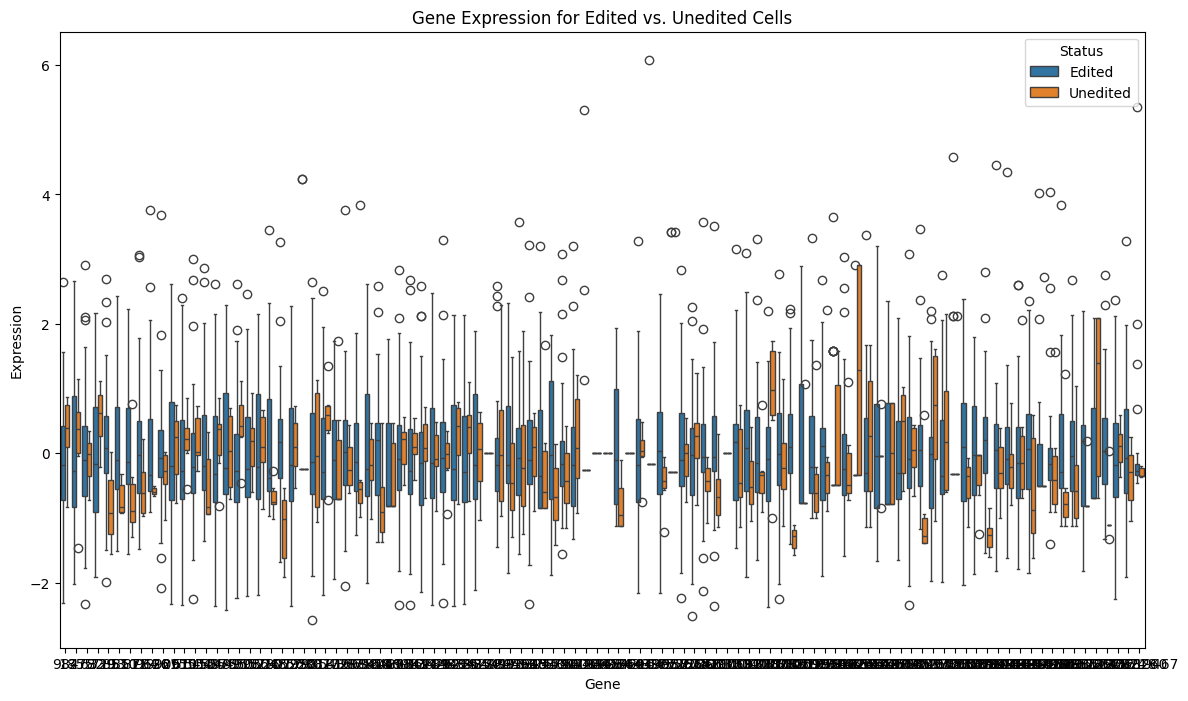

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of genes for visualization
selected_genes = scaled_df.columns[:100]  # Adjust for any other set of genes if needed

# Melt data for easy plotting
melted_df = scaled_df[selected_genes].reset_index().melt(id_vars=['index'], var_name='Gene', value_name='Expression')
melted_df['Status'] = melted_df['index'].map(lambda x: 'Edited' if scaled_df.loc[x, 'Edited (1) or Unedited (0)'] == 1 else 'Unedited')

# Plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=melted_df, x='Gene', y='Expression', hue='Status')
plt.title("Gene Expression for Edited vs. Unedited Cells")
plt.show()


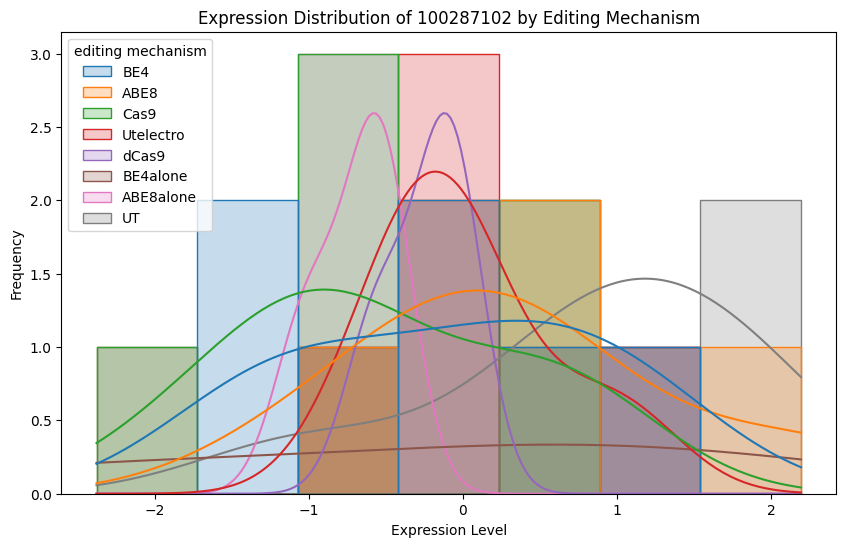

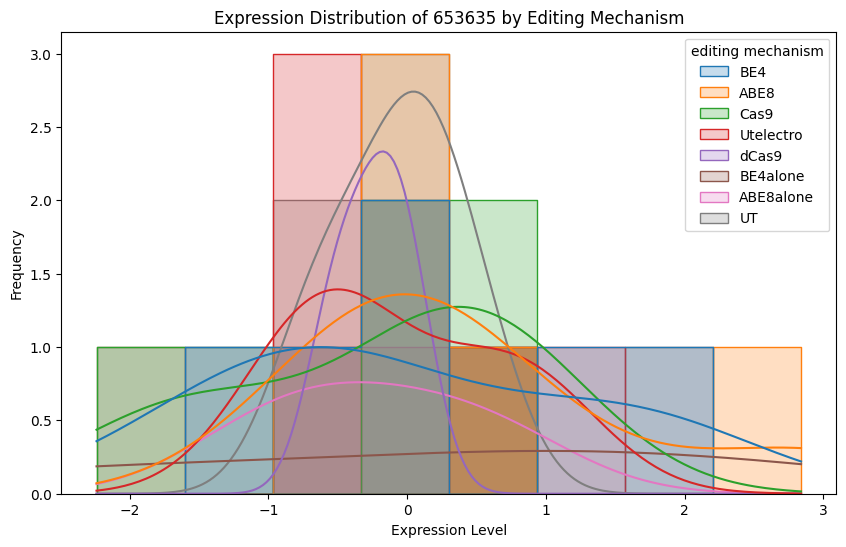

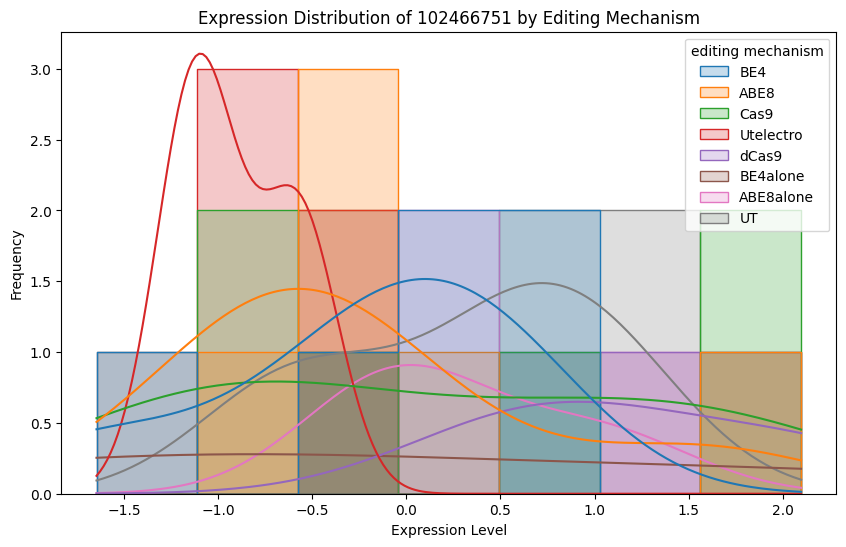

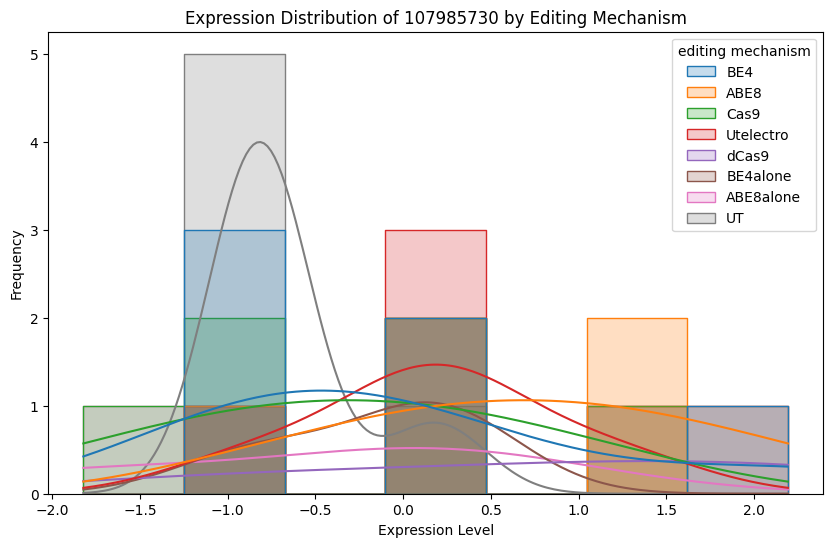

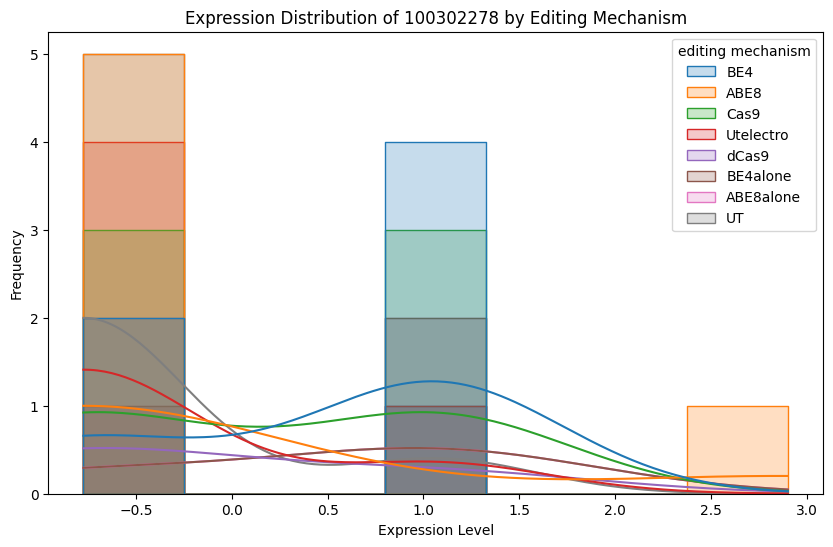

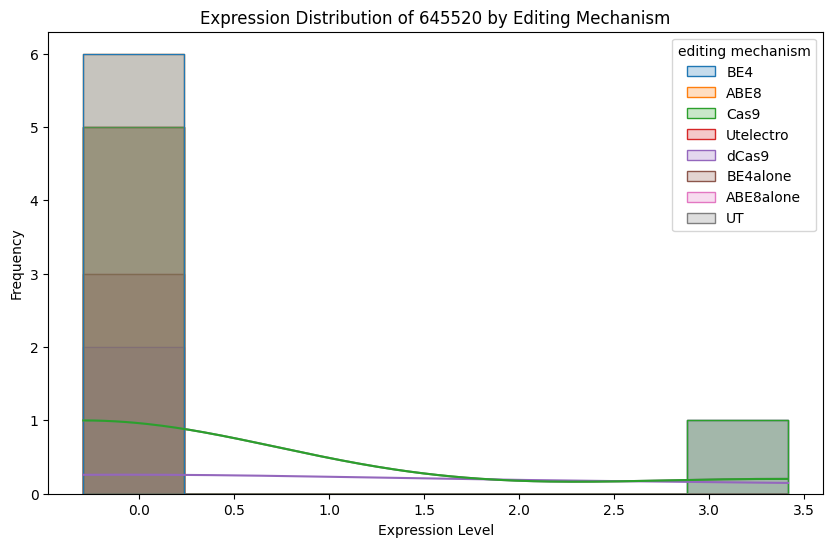

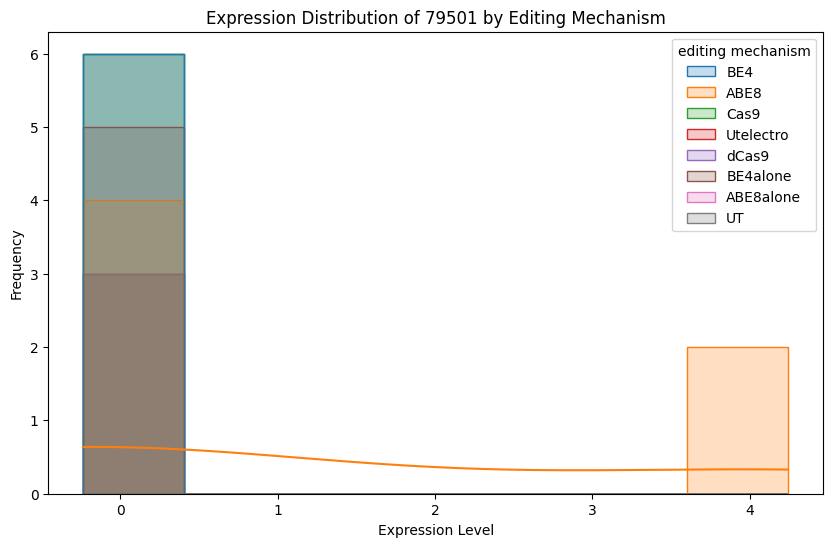

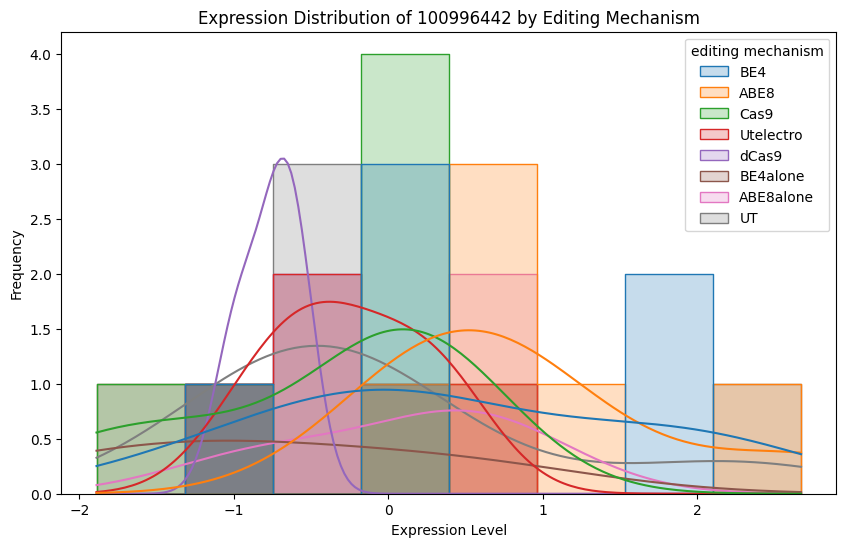

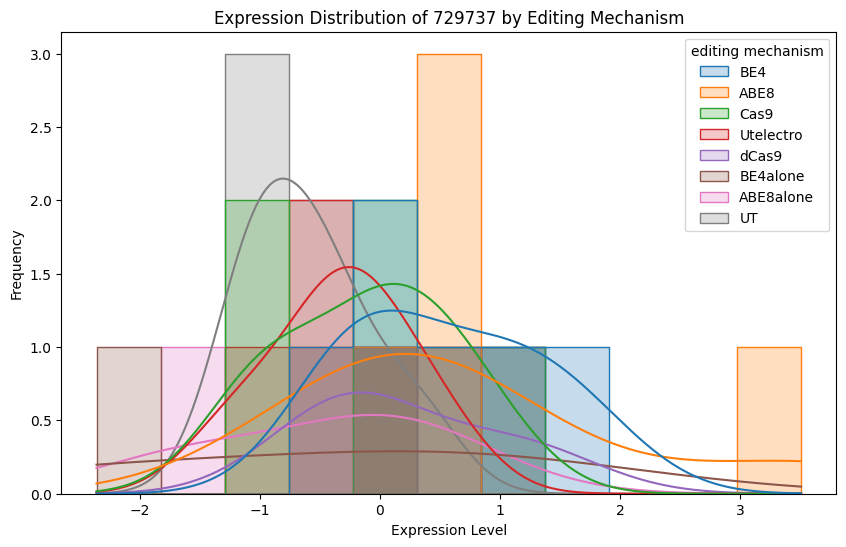

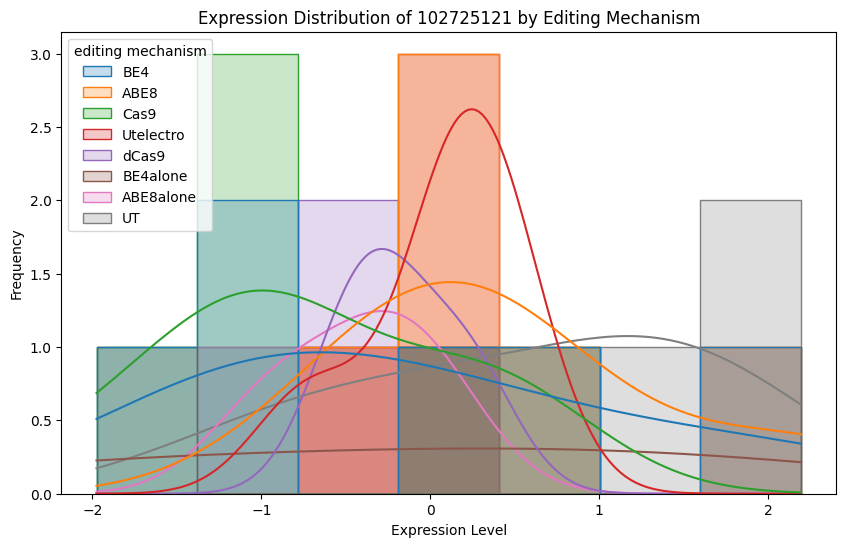

In [35]:
# Select a subset of genes
selected_genes = scaled_df.columns[:10]

# Plot histograms for each gene by editing mechanism
for gene in selected_genes:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=scaled_df, x=gene, hue='editing mechanism', kde=True, element="step")
    plt.title(f"Expression Distribution of {gene} by Editing Mechanism")
    plt.xlabel("Expression Level")
    plt.ylabel("Frequency")
    plt.show()


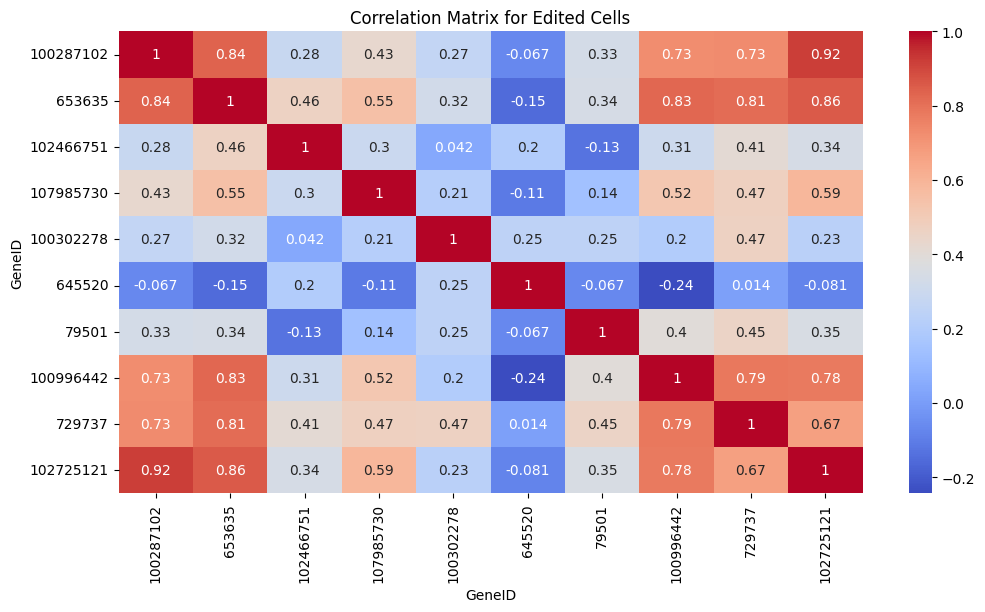

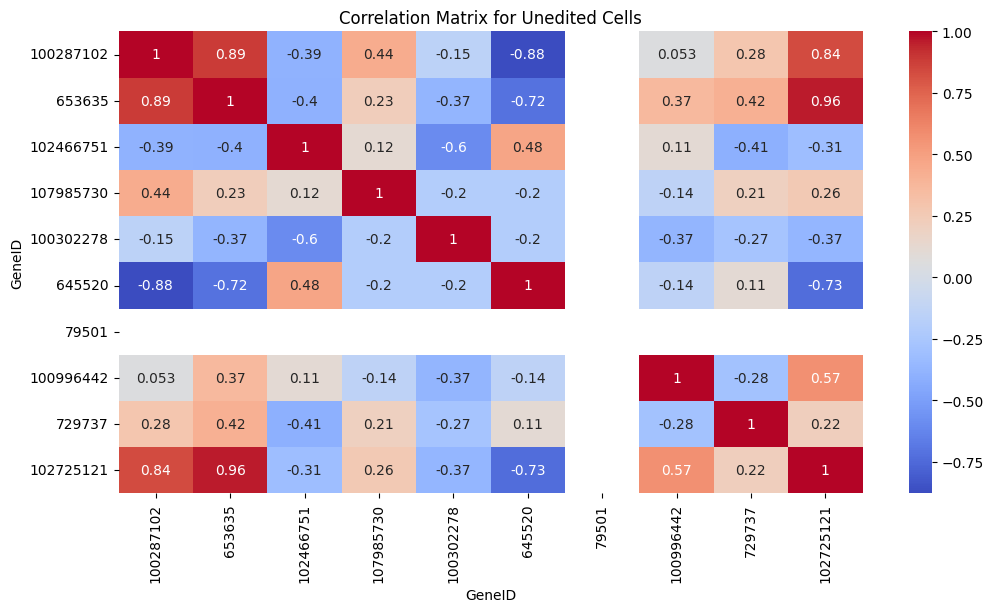

In [37]:
# Correlation matrices for edited and unedited cells
edited_corr = scaled_df[scaled_df['Edited (1) or Unedited (0)'] == 1][selected_genes].corr()
unedited_corr = scaled_df[scaled_df['Edited (1) or Unedited (0)'] == 0][selected_genes].corr()

# Heatmap for correlations
plt.figure(figsize=(12, 6))
sns.heatmap(edited_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Edited Cells")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(unedited_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Unedited Cells")
plt.show()


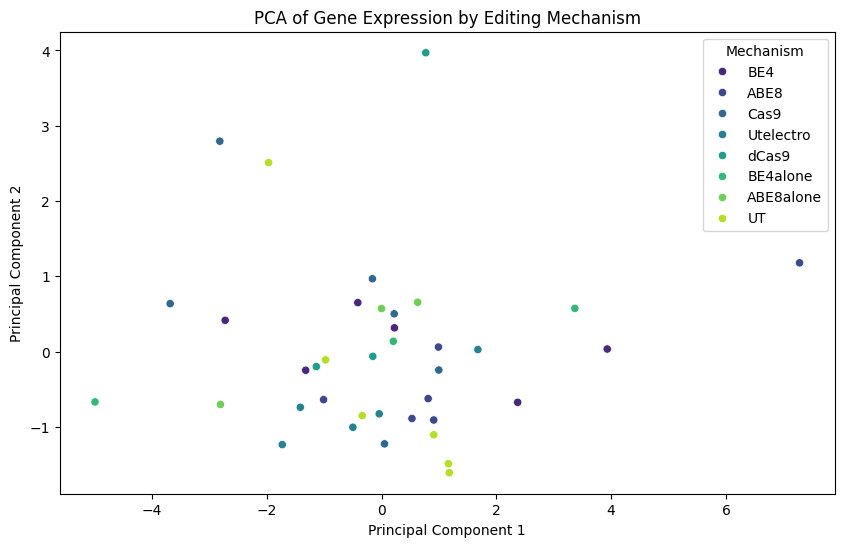

In [38]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df[selected_genes])
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'], index=scaled_df.index)
pca_df['Mechanism'] = scaled_df['editing mechanism']

# Plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Mechanism', palette="viridis")
plt.title("PCA of Gene Expression by Editing Mechanism")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [39]:
from scipy.stats import ttest_ind

# Conduct T-tests for selected genes between edited and unedited cells
t_test_results = {}
for gene in selected_genes:
    edited_expression = scaled_df[scaled_df['Edited (1) or Unedited (0)'] == 1][gene]
    unedited_expression = scaled_df[scaled_df['Edited (1) or Unedited (0)'] == 0][gene]
    t_stat, p_val = ttest_ind(edited_expression, unedited_expression)
    t_test_results[gene] = (t_stat, p_val)

print("T-test Results (t-statistic, p-value):\n", t_test_results)


T-test Results (t-statistic, p-value):
 {100287102: (np.float64(-2.28661273349728), np.float64(0.028204698549142867)), 653635: (np.float64(0.19854844683648548), np.float64(0.843733029771944)), 102466751: (np.float64(-0.8245897961640363), np.float64(0.41503487812160467)), 107985730: (np.float64(1.7646300609224843), np.float64(0.0861096214158802)), 100302278: (np.float64(1.2396042872694903), np.float64(0.223142005620081)), 645520: (np.float64(-0.8536655898367084), np.float64(0.3989350577610996)), 79501: (np.float64(0.6155870112510926), np.float64(0.5420396493445268)), 100996442: (np.float64(0.04991154892004468), np.float64(0.9604687749526055)), 729737: (np.float64(1.5864553747878336), np.float64(0.1213819316461581)), 102725121: (np.float64(-1.5370263071243755), np.float64(0.13303057219010314))}


C:\Users\mzora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


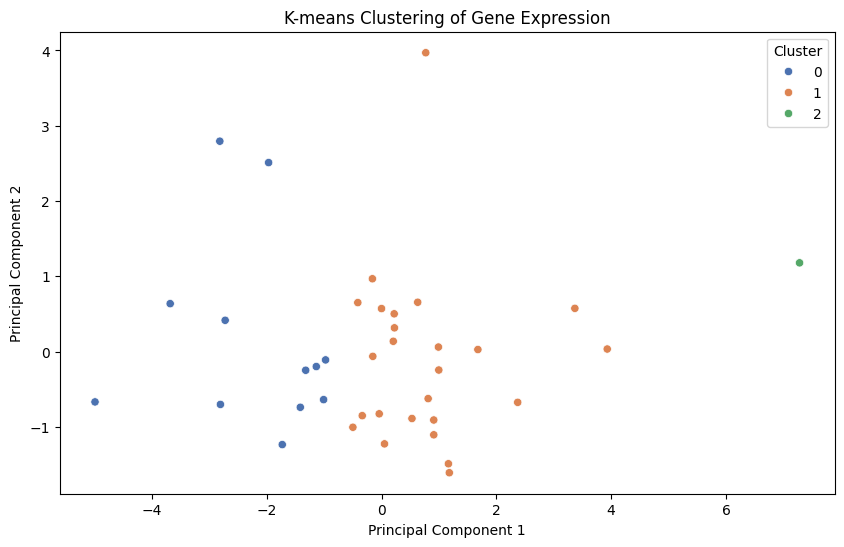

In [40]:
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Adjust clusters as needed
cluster_labels = kmeans.fit_predict(scaled_df[selected_genes])

# Add cluster labels to DataFrame
scaled_df['Cluster'] = cluster_labels

# Plot cluster distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue=scaled_df['Cluster'], palette="deep")
plt.title("K-means Clustering of Gene Expression")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


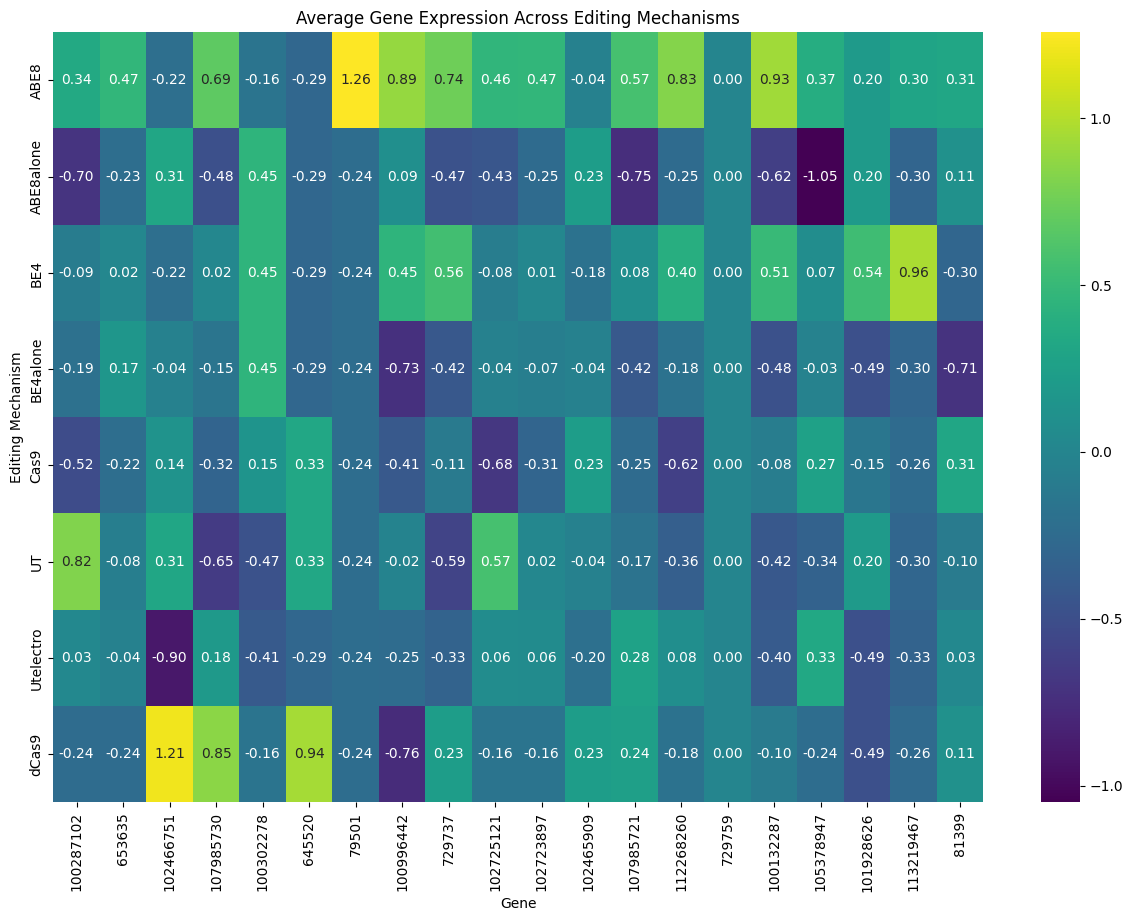

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of genes
subset_genes = scaled_df.columns[:20]  # Select first 20 genes for example

# Create a heatmap of gene expressions across editing mechanisms
plt.figure(figsize=(15, 10))
sns.heatmap(scaled_df.groupby('editing mechanism')[subset_genes].mean(), cmap='viridis', annot=True, fmt=".2f")
plt.title("Average Gene Expression Across Editing Mechanisms")
plt.xlabel("Gene")
plt.ylabel("Editing Mechanism")
plt.show()


In [42]:
from sklearn.decomposition import PCA
import numpy as np

# Perform PCA on selected genes
pca = PCA(n_components=2)
pca.fit(scaled_df[selected_genes])

# Get loadings (contributions) of each gene to the principal components
loadings = pd.DataFrame(pca.components_.T, index=selected_genes, columns=['PC1', 'PC2'])
top_genes_pc1 = loadings['PC1'].abs().nlargest(10).index
top_genes_pc2 = loadings['PC2'].abs().nlargest(10).index

print("Top Gene Contributors to PC1 (Edited vs. Unedited Differences):", top_genes_pc1)
print("Top Gene Contributors to PC2 (Mechanism-Specific Differences):", top_genes_pc2)


Top Gene Contributors to PC1 (Edited vs. Unedited Differences): Index([   653635, 102725121, 100996442,    729737, 100287102, 107985730,
           79501, 102466751, 100302278,    645520],
      dtype='object', name='GeneID')
Top Gene Contributors to PC2 (Mechanism-Specific Differences): Index([   645520, 100302278, 102466751,    729737, 102725121, 100287102,
       100996442, 107985730,     79501,    653635],
      dtype='object', name='GeneID')


C:\Users\mzora\AppData\Local\Temp\ipykernel_22916\744268133.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=scaled_df, x='editing mechanism', y=gene, palette='Set2')


<Figure size 1400x800 with 0 Axes>

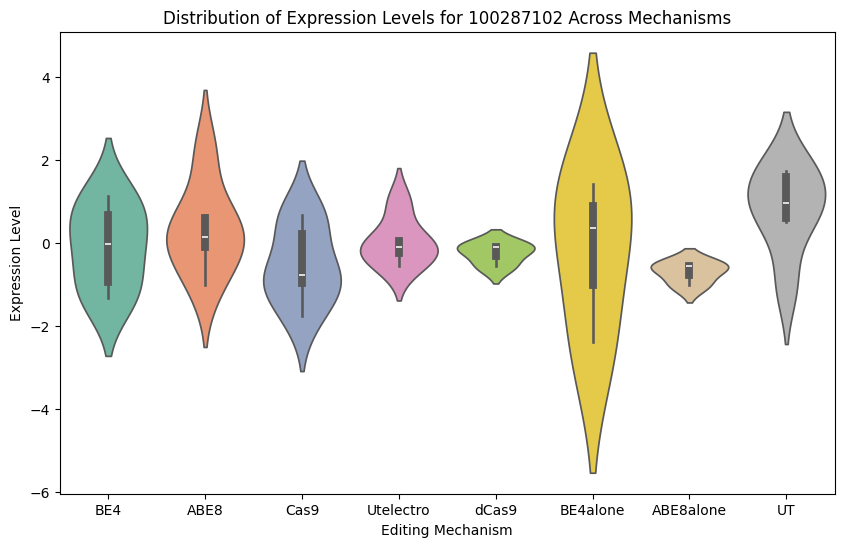

C:\Users\mzora\AppData\Local\Temp\ipykernel_22916\744268133.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=scaled_df, x='editing mechanism', y=gene, palette='Set2')


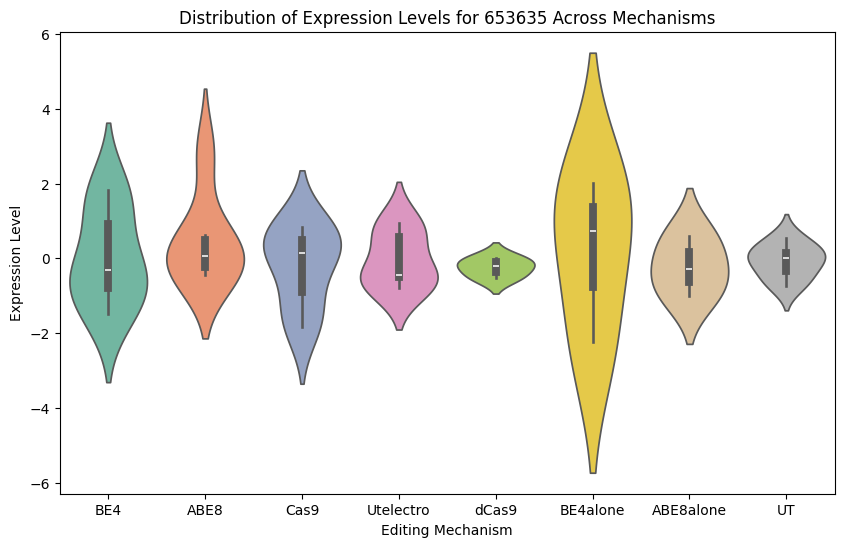

C:\Users\mzora\AppData\Local\Temp\ipykernel_22916\744268133.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=scaled_df, x='editing mechanism', y=gene, palette='Set2')


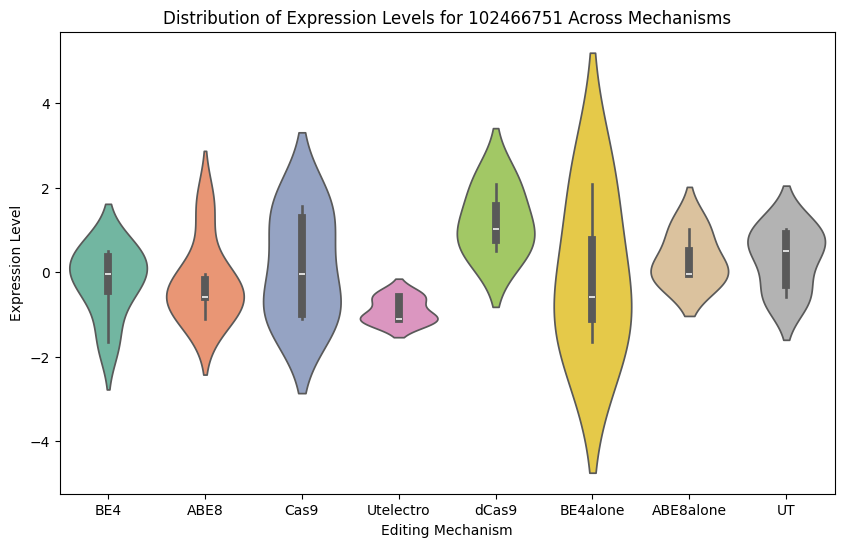

C:\Users\mzora\AppData\Local\Temp\ipykernel_22916\744268133.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=scaled_df, x='editing mechanism', y=gene, palette='Set2')


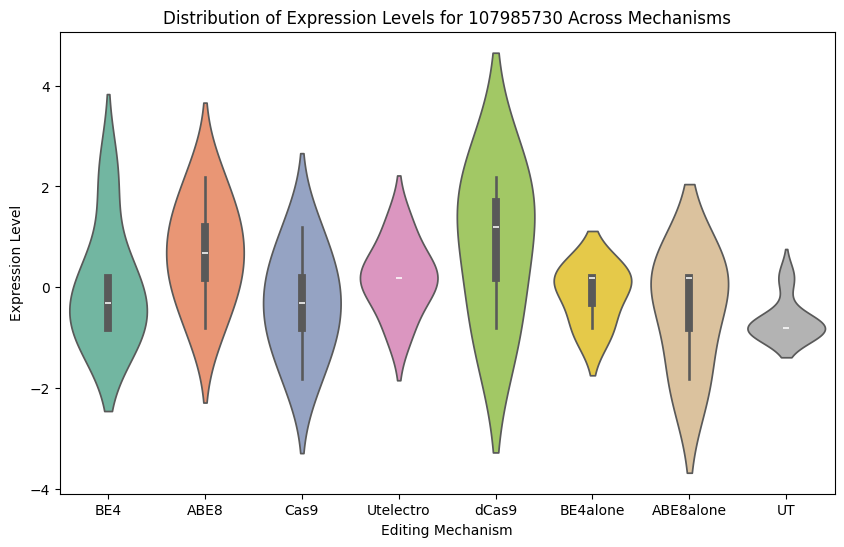

C:\Users\mzora\AppData\Local\Temp\ipykernel_22916\744268133.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=scaled_df, x='editing mechanism', y=gene, palette='Set2')


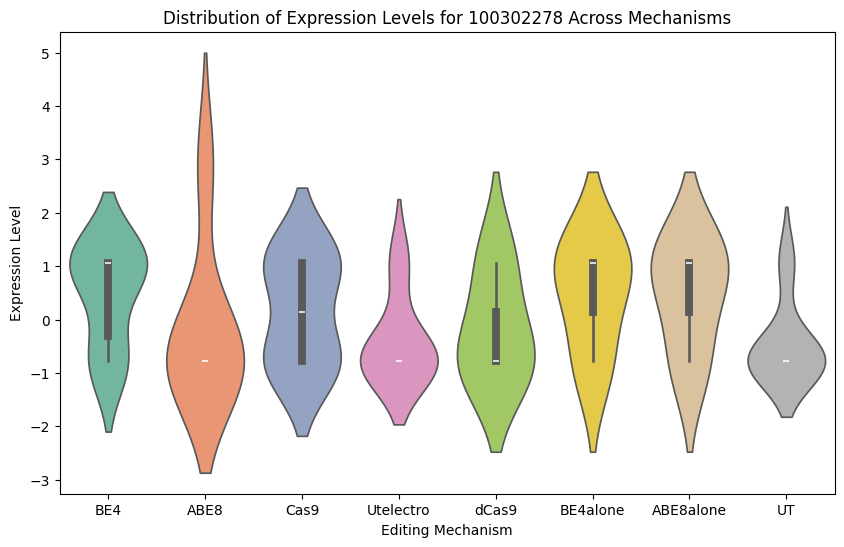

In [43]:
# Plot distribution of expression levels for selected genes across mechanisms
plt.figure(figsize=(14, 8))
for gene in selected_genes[:5]:  # Limiting to 5 genes for clarity
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=scaled_df, x='editing mechanism', y=gene, palette='Set2')
    plt.title(f"Distribution of Expression Levels for {gene} Across Mechanisms")
    plt.xlabel("Editing Mechanism")
    plt.ylabel("Expression Level")
    plt.show()


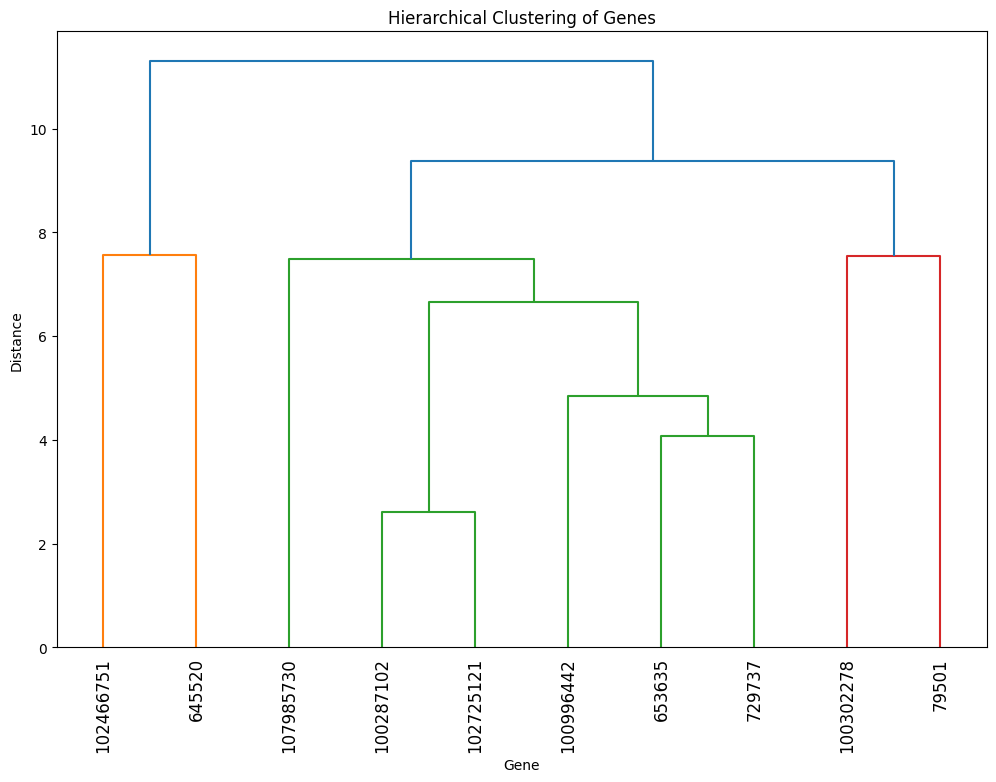

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(scaled_df[selected_genes].T, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linked, labels=selected_genes, leaf_rotation=90)
plt.title("Hierarchical Clustering of Genes")
plt.xlabel("Gene")
plt.ylabel("Distance")
plt.show()


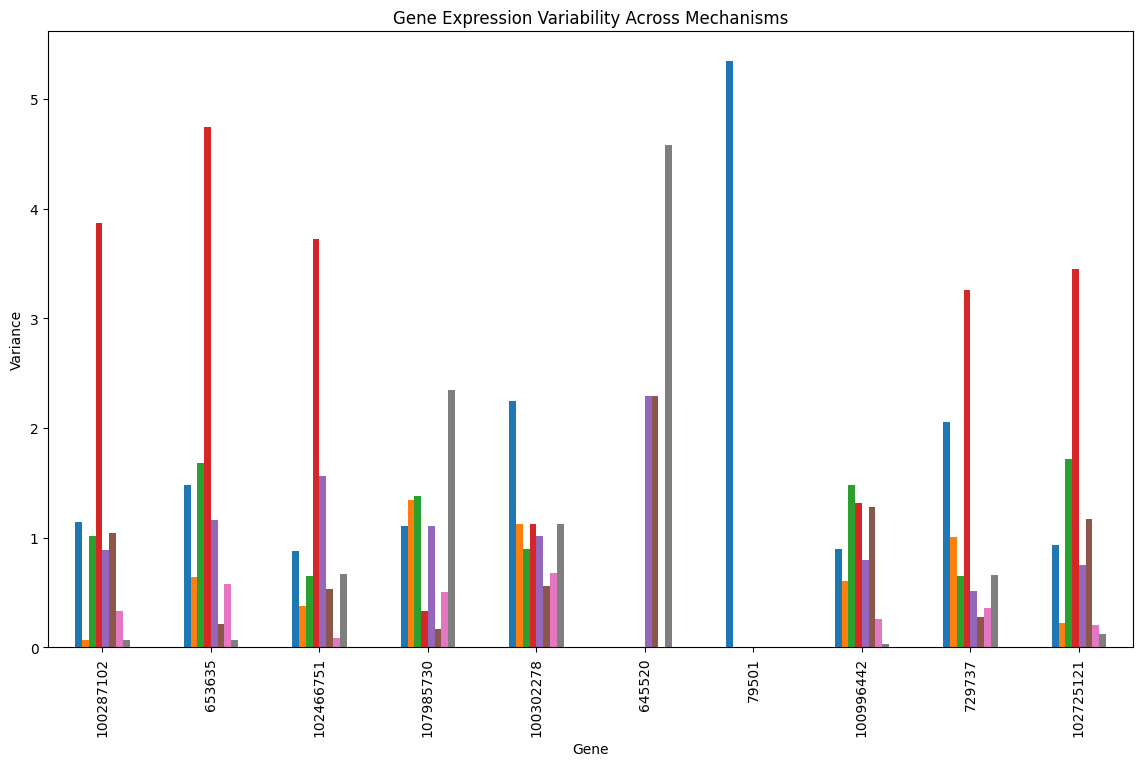

In [39]:
# Calculate variance of gene expressions across mechanisms
variance_df = scaled_df.groupby('editing mechanism')[selected_genes].var().T
variance_df.plot(kind='bar', figsize=(14, 8), legend=False)
plt.title("Gene Expression Variability Across Mechanisms")
plt.xlabel("Gene")
plt.ylabel("Variance")
plt.show()


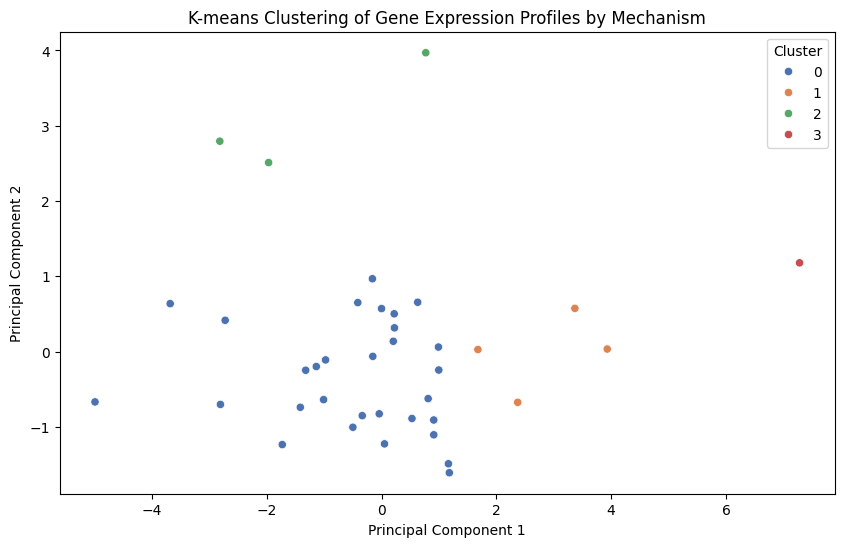

In [44]:
from sklearn.cluster import KMeans

# Perform K-means clustering on genes across mechanisms
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_labels = kmeans.fit_predict(scaled_df[selected_genes])

# Assign clusters to the DataFrame for plotting
scaled_df['KMeans Cluster'] = kmeans_labels

# Plot PCA with K-means clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df[selected_genes])
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'], index=scaled_df.index)
pca_df['Cluster'] = kmeans_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='deep')
plt.title("K-means Clustering of Gene Expression Profiles by Mechanism")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
